In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import integration as ig
from matplotlib import interactive
interactive(True)
from sympy import symbols
from IPython.display import display
sy.init_printing(use_latex="png",scale=2)

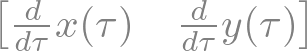

In [2]:
tau,sigma = symbols('tau,sigma',real=True)
x = sy.Function("x",real=True)(tau)
y = sy.Function("y",real=True)(tau)
r = sy.Array([x,y])
vx = sy.Derivative(x,tau)
vy = sy.Derivative(y,tau)
v = sy.Array([vx,vy])
display(v)

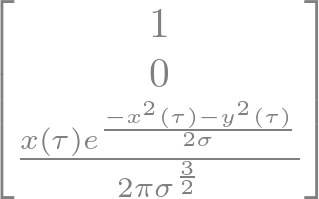

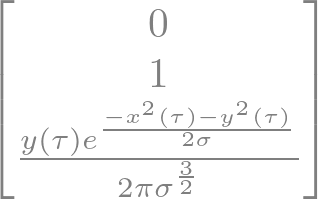

In [3]:
#z = -1/sy.sqrt(x**2+y**2)
sigma_val = 1.0
z = -sy.exp(-(x**2+y**2)/(2*sigma))/(2*sy.pi*sy.sqrt(sigma))
X1 = sy.MutableDenseMatrix([1,0,sy.diff(z,x)])
X2 = sy.MutableDenseMatrix([0,1,sy.diff(z,y)])
display(X1)
display(X2)

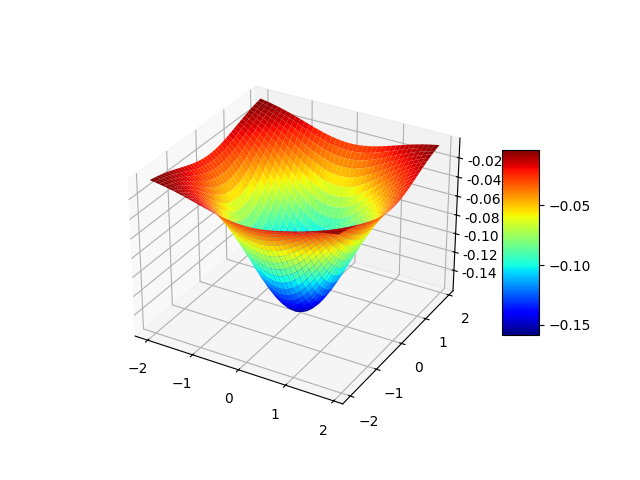

In [4]:
%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = sy.lambdify([x,y,sigma],z)(X,Y,sigma_val)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="jet", linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
X1X2 = sy.DotProduct(X1,X2).doit()
X1X1 = sy.DotProduct(X1,X1).doit()
X2X2 = sy.DotProduct(X2,X2).doit()

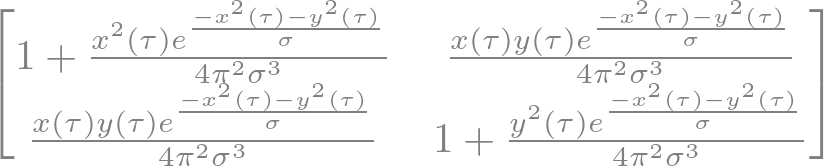

In [6]:
#g = sy.Matrix([[x**2+y**2,0],[0,x**2+y**2+1/(x**2+y**2)]])
#g = sy.Matrix([[1+x**2/(x**2+y**2)**3,x*y/(x**2+y**2)**3],[x*y/(x**2+y**2)**3,1+y**2/(x**2+y**2)**3]])
g = sy.Matrix([[X1X1,X1X2],[X1X2,X2X2]])
ndims = g.rows
display(g)

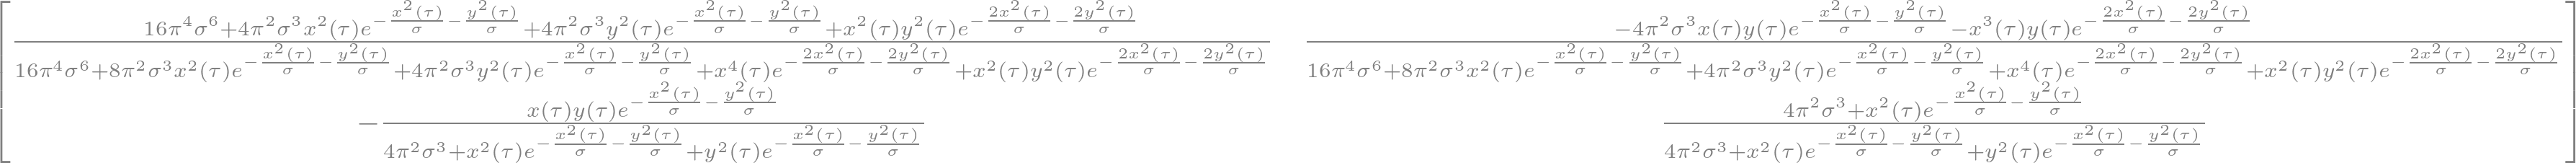

In [7]:
gi = g.inv()
display(gi)

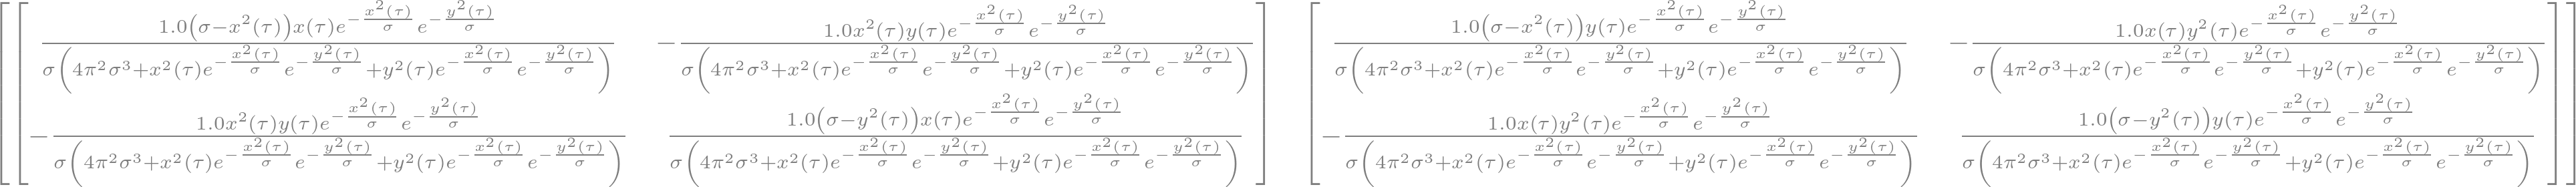

In [8]:
gamma = sy.MutableDenseNDimArray(np.zeros((ndims,ndims,ndims),dtype=int))
for i in range(ndims):
    for k in range(ndims):
        for l in range(ndims):
            for m in range(ndims):
                gamma[i,k,l] += 1/2*gi[i,m]*(sy.diff(g[m,k],r[l]) + sy.diff(g[m,l],r[k]) - sy.diff(g[k,l],r[m]))
gamma = sy.factor(gamma)
display(gamma)

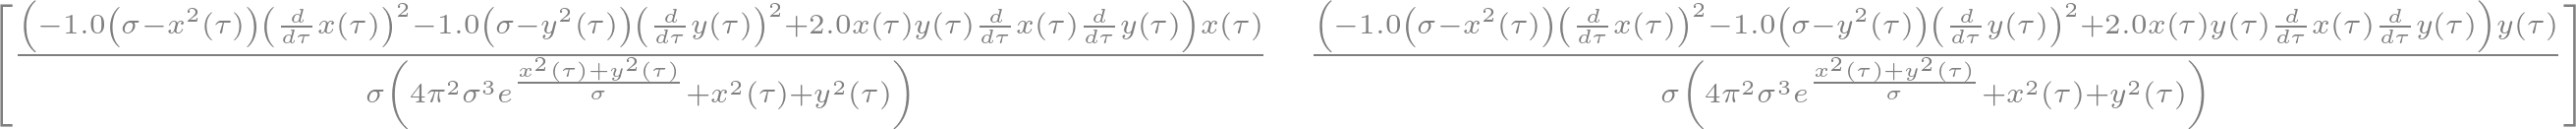

In [9]:
acc = sy.MutableDenseNDimArray(np.zeros((ndims),dtype=int))
for beta in range(ndims):
    for alpha in range(ndims):
        for nu in range(ndims):
            acc[beta] -= gamma[beta,alpha,nu]*v[alpha]*v[nu]
acc = sy.simplify(acc)
display(acc)

In [10]:
accx = sy.lambdify([x,y,vx,vy,sigma],acc[0])
accy = sy.lambdify([x,y,vx,vy,sigma],acc[1])

In [11]:
def accF(x,y,vx,vy):
    return (accx(x,y,vx,vy,sigma_val),accy(x,y,vx,vy,sigma_val))
def accF_gravity(x,y,vx,vy):
    r = np.sqrt(x**2+y**2)
    return (-x/r**3,-y/r**3)

In [16]:
starts = []
for y in np.linspace(0.1,0.5,15):
    starts.append([0,y,-1,0.0])

trajectories = []
for start in starts:
    taus, infos = ig.get_geodesic(start[0],start[1],start[2],start[3],accF,dtau=0.01,N=1000)
    trajectories.append(infos[:2])

/tmp/ipykernel_8157/1417078389.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


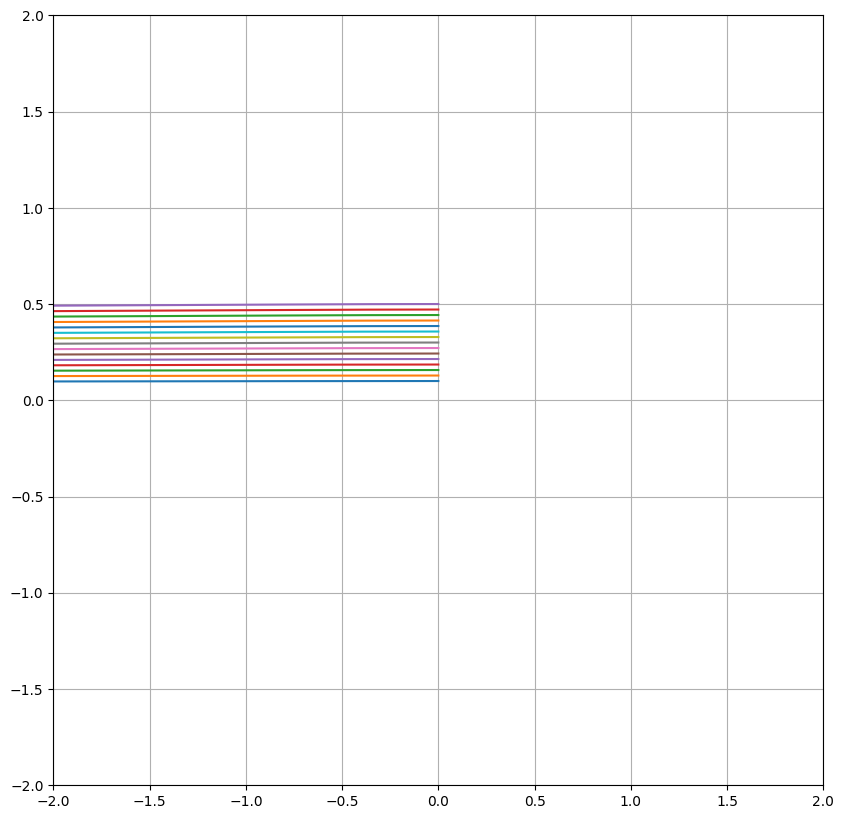

In [19]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_aspect(1.0)
for p in trajectories:
    ax.plot(p[0],p[1])
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.grid()
fig.show()